<a href="https://colab.research.google.com/github/cypherkrish/PythonDataScience-Exercises/blob/main/02_Session_Data_Visualisation_DS_fig09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import warnings
import datetime as dt
warnings.filterwarnings('ignore')

In [5]:
dfm = pd.read_csv('https://raw.githubusercontent.com/cypherkrish/PythonDataScience/main/Data/matchs.csv')
dfd = pd.read_csv('https://raw.githubusercontent.com/cypherkrish/PythonDataScience/main/Data/deliveris.csv')

Draw a bar plot on Strike rate of top 10 innings by a batsman when they score 100 in a particular match.
- Formula for Strike Rate calculation - (Batsmen Runs per match / balls faced) * 100
- Here kindly try using dataframe plotting.
Expected Plot

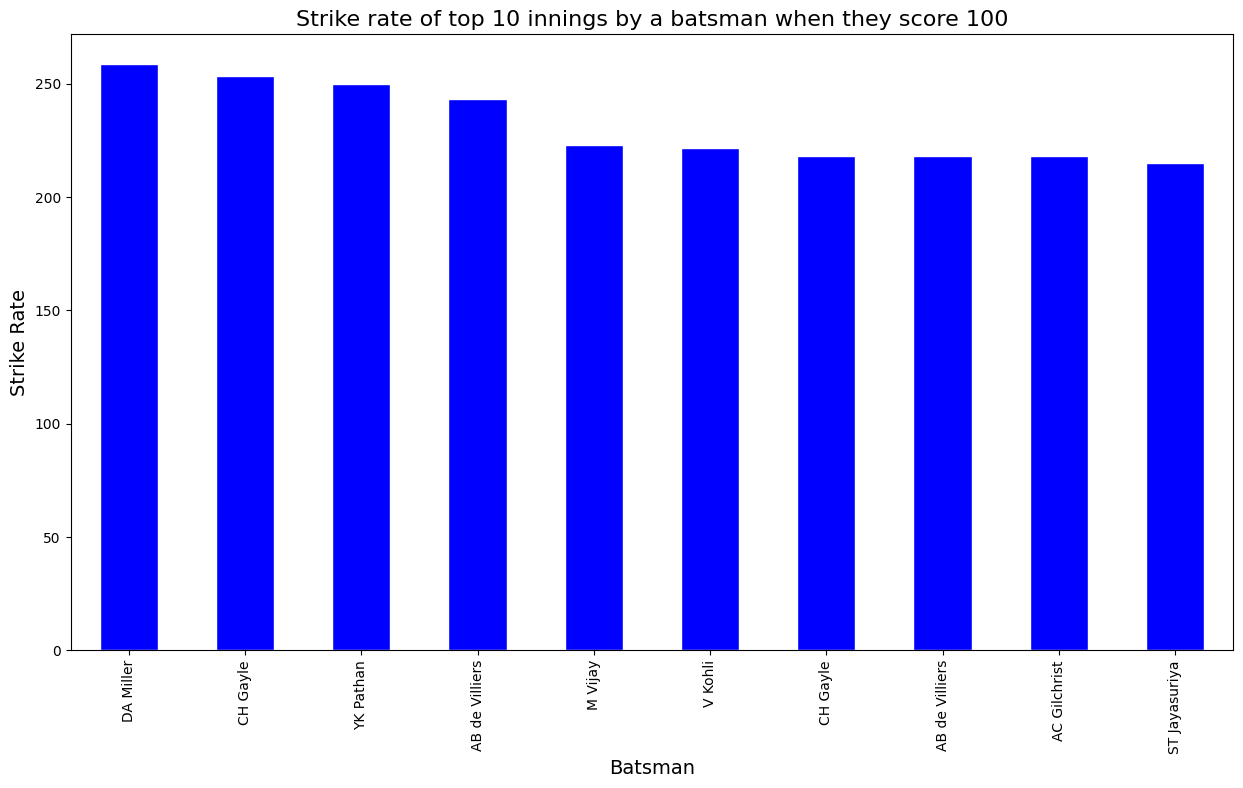

In [6]:
fig9,ax9=plt.subplots(figsize=(15,8))
###Start code here
data_ballsFaced_RunsScored = dfd.groupby(['match_id', 'batsman'])[['ball', 'batsman_runs']].agg(['size', 'sum']).reset_index()
dic = {}
balls_faced = list(data_ballsFaced_RunsScored['ball']['size'])
runs_scored = list (data_ballsFaced_RunsScored['batsman_runs']['sum'])
dic['match_id'] = list(data_ballsFaced_RunsScored['match_id'])
dic['batsman'] = list(data_ballsFaced_RunsScored['batsman'])
dic['balls_faced'] = balls_faced
dic['runs_scored'] = runs_scored
result = pd.DataFrame(dic)

result['StrikeRate'] = 100 * result['runs_scored'] / result['balls_faced']
result[result['runs_scored'] >= 100].sort_values(by='StrikeRate', ascending=False).head(10)

top_10_innings = result[result['runs_scored'] >= 100].sort_values(by='StrikeRate', ascending=False).head(10)

top_10_innings.plot(
    kind='bar',
    x='batsman',
    y='StrikeRate',
    color='blue',
    edgecolor='white',
    ax=ax9,
    legend=False
)

ax9.set_title('Strike rate of top 10 innings by a batsman when they score 100', fontsize=16)
ax9.set_xlabel('Batsman', fontsize=14)
ax9.set_ylabel('Strike Rate', fontsize=14)
plt.show()